In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_selection import VarianceThreshold

from warnings import simplefilter
simplefilter("ignore")

In [3]:
data1 = pd.read_csv('data.csv')
data1 = pd.DataFrame(data1)
data1.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data1.shape

(6819, 96)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
print(data1.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
data1.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
data1.columns[data1.isnull().any()]
#no null values

Index([], dtype='object')

In [9]:
data1.duplicated().sum()
#no duplicated values

0

In [10]:
print(data1['Bankrupt?'].value_counts().reset_index(name='count'))
counts = data1['Bankrupt?'].value_counts()


   Bankrupt?  count
0          0   6599
1          1    220


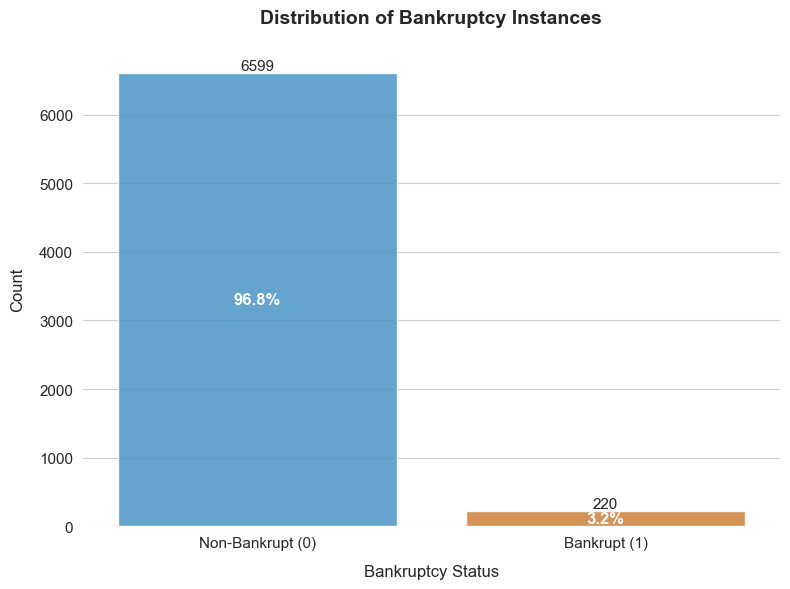

In [11]:
# EDA for distribution of class instances

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=counts.index, y=counts.values, palette=["#3498db", "#e67e22"], alpha=0.85)

plt.xlabel("Bankruptcy Status", fontsize=12, labelpad=10)
plt.ylabel("Count", fontsize=12, labelpad=10)
plt.title("Distribution of Bankruptcy Instances", fontsize=14, pad=20, fontweight='bold')

plt.xticks(ticks=[0, 1], labels=["Non-Bankrupt (0)", "Bankrupt (1)"], fontsize=11)
plt.yticks(fontsize=11)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=11)

sns.despine(left=True, bottom=True)

total = sum(counts.values)
percentages = [(count/total)*100 for count in counts.values]
for i, pct in enumerate(percentages):
    ax.text(i, counts.values[i]/2, f'{pct:.1f}%', 
            ha='center', va='center', 
            color='white', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
smote_data = pd.read_csv('SMOTE_data.csv')
smote_data = pd.DataFrame(smote_data)
smote_data.head()

,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,Continuous.interest.rate..after.tax.,...,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability,class
0,0.412616,0.422209,0.453557,0.598358,0.598358,0.998916,0.796831,0.808784,0.302660,0.781215,...,0.008544,0.623109,0.598354,0.829094,0.281469,0.026637,0.564297,1,0.024493,1
1,0.459221,0.524041,0.512233,0.594654,0.594654,0.998932,0.797336,0.809269,0.303510,0.781528,...,0.001422,0.622856,0.594649,0.838838,0.289838,0.026137,0.556960,1,0.016619,1
2,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
3,0.447472,0.510903,0.499277,0.604398,0.604398,0.998835,0.797051,0.809006,0.303213,0.781239,...,0.040236,0.623081,0.604398,0.837130,0.287878,0.026215,0.559116,1,0.017567,1
4,0.441476,0.511666,0.491675,0.592088,0.592088,0.998851,0.797184,0.809122,0.303413,0.781251,...,0.006191,0.622513,0.592087,0.838680,0.279720,0.026297,0.560741,1,0.029445,1


In [13]:
smote_data

,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,Continuous.interest.rate..after.tax.,...,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability,class
0,0.412616,0.422209,0.453557,0.598358,0.598358,0.998916,0.796831,0.808784,0.302660,0.781215,...,0.008544,0.623109,0.598354,0.829094,0.281469,0.026637,0.564297,1,0.024493,1
1,0.459221,0.524041,0.512233,0.594654,0.594654,0.998932,0.797336,0.809269,0.303510,0.781528,...,0.001422,0.622856,0.594649,0.838838,0.289838,0.026137,0.556960,1,0.016619,1
2,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
3,0.447472,0.510903,0.499277,0.604398,0.604398,0.998835,0.797051,0.809006,0.303213,0.781239,...,0.040236,0.623081,0.604398,0.837130,0.287878,0.026215,0.559116,1,0.017567,1
4,0.441476,0.511666,0.491675,0.592088,0.592088,0.998851,0.797184,0.809122,0.303413,0.781251,...,0.006191,0.622513,0.592087,0.838680,0.279720,0.026297,0.560741,1,0.029445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,0.491639,0.549498,0.537877,0.613219,0.613168,0.998999,0.797436,0.809344,0.303543,0.781604,...,0.000548,0.623743,0.613219,0.840676,0.276560,0.026811,0.565253,1,0.061753,0
9012,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890,0
9013,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284,0
9014,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009,0


By using Log Regression to pick variables, we can keep the variables which has high variance and contributes to the model, ensuring only relevant variables are kept

In [ ]:
# LOG regression to keep top 30 variables

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = smote_data.drop('class', axis=1)
y = smote_data['class']

# Example with sample data
from sklearn.datasets import make_classification

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y)

coefficients = logreg.coef_[0]


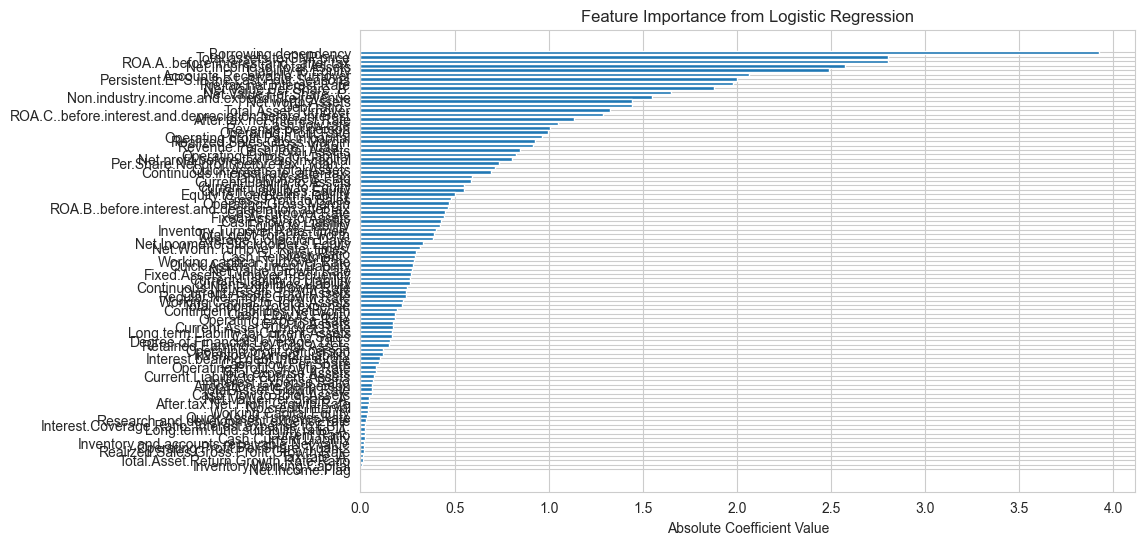

In [15]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': abs(coefficients)  
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()  # Most important at top
plt.show()

In [16]:
feature_importance

,Feature,Importance
39,Borrowing.dependency,3.921301
86,Total.assets.to.GNP.price,2.805216
1,ROA.A..before.interest.and...after.tax,2.801320
85,Net.Income.to.Total.Assets,2.572372
90,Liability.to.Equity,2.489458
...,...,...
23,Realized.Sales.Gross.Profit.Growth.Rate,0.016525
14,Tax.rate..A.,0.015697
30,Total.Asset.Return.Growth.Rate.Ratio,0.015144
61,Inventory.Working.Capital,0.009504


0.4 was the median of the importances, so we used that as the threshold for variable importance

In [17]:
# First filter features with Importance > 0.4, then take top 30
top_features_threshold = (feature_importance[feature_importance['Importance'] > 0.4])

top_features_list = top_features_threshold['Feature'].tolist()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_top_threshold = smote_data[top_features_list]

# 3. Calculate VIF for each of these top features
vif_results = []
for i, col in enumerate(top_features_list):
    vif = variance_inflation_factor(X_top_threshold.values, i)
    vif_results.append(vif)

# 4. Create results DataFrame
vif_df = pd.DataFrame({
    'Feature': top_features_list,
    'VIF': vif_results,
    'Importance': feature_importance.set_index('Feature').loc[top_features_list, 'Importance']
})

# Sort by VIF (descending)
vif_df = vif_df.sort_values('VIF', ascending=False)

# Display results
print(vif_df)

                                                                                              Feature  \
Feature                                                                                                 
Current.Liabilities.Equity                                                 Current.Liabilities.Equity   
Current.Liability.to.Equity                                               Current.Liability.to.Equity   
Debt.ratio..                                                                             Debt.ratio..   
Net.worth.Assets                                                                     Net.worth.Assets   
Operating.Profit.Rate                                                           Operating.Profit.Rate   
Non.industry.income.and.expenditure.revenue               Non.industry.income.and.expenditure.revenue   
Pre.tax.net.Interest.Rate                                                   Pre.tax.net.Interest.Rate   
Gross.Profit.to.Sales                                  

In [19]:
top_df = smote_data[top_features_list]

# Compute correlation matrix
corr_matrix = top_df.corr().abs()

In [20]:
# Find features with correlation > 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:  # Adjust threshold as needed
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            
# Display collinear pairs sorted by correlation strength
sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
for pair in sorted_pairs:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.2f}")

Current.Liabilities.Equity vs Current.Liability.to.Equity: 1.00
Debt.ratio.. vs Net.worth.Assets: 1.00
Operating.Gross.Margin vs Gross.Profit.to.Sales: 1.00
Gross.Profit.to.Sales vs Realized.Sales.Gross.Margin: 1.00
Operating.Gross.Margin vs Realized.Sales.Gross.Margin: 1.00
Net.Value.Per.Share..C. vs Net.Value.Per.Share..B.: 1.00
Continuous.interest.rate..after.tax. vs Pre.tax.net.Interest.Rate: 1.00
Liability.to.Equity vs Borrowing.dependency: 0.99
ROA.B..before.interest.and.depreciation.after.tax vs ROA.C..before.interest.and.depreciation.before.interest: 0.99
Continuous.interest.rate..after.tax. vs After.tax.net.Interest.Rate: 0.99
After.tax.net.Interest.Rate vs Pre.tax.net.Interest.Rate: 0.98
Per.Share.Net.profit.before.tax..Yuan... vs Net.profit.before.tax.Paid.in.capital: 0.98
Net.Income.to.Total.Assets vs ROA.A..before.interest.and...after.tax: 0.97
Net.profit.before.tax.Paid.in.capital vs Persistent.EPS.in.the.Last.Four.Seasons: 0.97
Current.Liability.to.Equity vs Liability.to

In [21]:
features_to_remove = set()

for f1, f2, corr in sorted_pairs:
    if f1 in features_to_remove or f2 in features_to_remove:
        continue
        
    # Compare feature importance
    imp1 = feature_importance.loc[feature_importance['Feature'] == f1, 'Importance'].values[0]
    imp2 = feature_importance.loc[feature_importance['Feature'] == f2, 'Importance'].values[0]
    
    # Decision logic
    if imp1 > imp2:
        features_to_remove.add(f2)
        print(f"Removing {f2} (kept {f1}, importance: {imp1:.2f} > {imp2:.2f})")
    else:
        features_to_remove.add(f1)
        print(f"Removing {f1} (kept {f2}, importance: {imp2:.2f} > {imp1:.2f})")

# Final feature set
final_features = [f for f in top_features_list if f not in features_to_remove]

Removing Current.Liabilities.Equity (kept Current.Liability.to.Equity, importance: 0.55 > 0.55)
Removing Debt.ratio.. (kept Net.worth.Assets, importance: 1.44 > 1.44)
Removing Operating.Gross.Margin (kept Gross.Profit.to.Sales, importance: 0.48 > 0.47)
Removing Gross.Profit.to.Sales (kept Realized.Sales.Gross.Margin, importance: 0.93 > 0.48)
Removing Net.Value.Per.Share..C. (kept Net.Value.Per.Share..B., importance: 1.88 > 1.65)
Removing Continuous.interest.rate..after.tax. (kept Pre.tax.net.Interest.Rate, importance: 1.98 > 0.69)
Removing Liability.to.Equity (kept Borrowing.dependency, importance: 3.92 > 2.49)
Removing ROA.B..before.interest.and.depreciation.after.tax (kept ROA.C..before.interest.and.depreciation.before.interest, importance: 1.29 > 0.46)
Removing After.tax.net.Interest.Rate (kept Pre.tax.net.Interest.Rate, importance: 1.98 > 1.14)
Removing Per.Share.Net.profit.before.tax..Yuan... (kept Net.profit.before.tax.Paid.in.capital, importance: 0.81 > 0.74)
Removing Net.Income

In [22]:
final_features

['Borrowing.dependency',
 'Total.assets.to.GNP.price',
 'ROA.A..before.interest.and...after.tax',
 'Accounts.Receivable.Turnover',
 'Pre.tax.net.Interest.Rate',
 'Net.Value.Per.Share..B.',
 'Non.industry.income.and.expenditure.revenue',
 'Net.worth.Assets',
 'Total.Asset.Turnover',
 'Cash.flow.rate',
 'Revenue.per.person',
 'Realized.Sales.Gross.Margin',
 'Revenue.Per.Share..Yuan...',
 'Cash.Total.Assets',
 'Quick.Assets.Total.Assets',
 'Liability.Assets.Flag',
 'Cash.Turnover.Rate',
 'Fixed.Assets.to.Assets',
 'Cash.Flow.to.Liability',
 'Equity.to.Liability',
 'Inventory.Turnover.Rate..times.']

Check Multicollinearity again

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_top_threshold = smote_data[final_features]

# 3. Calculate VIF for each of these top features
vif_results = []
for i, col in enumerate(final_features):
    vif = variance_inflation_factor(X_top_threshold.values, i)
    vif_results.append(vif)

# 4. Create results DataFrame
vif_df = pd.DataFrame({
    'Feature': final_features,
    'VIF': vif_results,
    'Importance': feature_importance.set_index('Feature').loc[final_features, 'Importance']
})

# Sort by VIF (descending)
vif_df = vif_df.sort_values('VIF', ascending=False)

# Display results
print(vif_df)
cleaned_smote = smote_data[final_features]

                                                                                 Feature  \
Feature                                                                                    
Net.worth.Assets                                                        Net.worth.Assets   
ROA.A..before.interest.and...after.tax            ROA.A..before.interest.and...after.tax   
Equity.to.Liability                                                  Equity.to.Liability   
Quick.Assets.Total.Assets                                      Quick.Assets.Total.Assets   
Cash.Total.Assets                                                      Cash.Total.Assets   
Net.Value.Per.Share..B.                                          Net.Value.Per.Share..B.   
Liability.Assets.Flag                                              Liability.Assets.Flag   
Cash.flow.rate                                                            Cash.flow.rate   
Cash.Flow.to.Liability                                            Cash.Flow.to.L

In [24]:
train_smote = smote_data[final_features + ['class']]

In [25]:
cleaned_smote

,Borrowing.dependency,Total.assets.to.GNP.price,ROA.A..before.interest.and...after.tax,Accounts.Receivable.Turnover,Pre.tax.net.Interest.Rate,Net.Value.Per.Share..B.,Non.industry.income.and.expenditure.revenue,Net.worth.Assets,Total.Asset.Turnover,Cash.flow.rate,...,Realized.Sales.Gross.Margin,Revenue.Per.Share..Yuan...,Cash.Total.Assets,Quick.Assets.Total.Assets,Liability.Assets.Flag,Cash.Turnover.Rate,Fixed.Assets.to.Assets,Cash.Flow.to.Liability,Equity.to.Liability,Inventory.Turnover.Rate..times.
0,0.379078,0.008544,0.422209,0.009429,0.796831,0.142008,0.302660,0.851286,0.083958,0.488644,...,0.598358,0.011102,0.003169,0.024428,0.0,2.500000e+08,0.348955,0.458756,0.024493,2.250000e+09
1,0.380584,0.001422,0.524041,0.000503,0.797336,0.159285,0.303510,0.793935,0.127436,0.462147,...,0.594654,0.034273,0.043945,0.484530,0.0,3.720000e+08,0.264910,0.458149,0.016619,9.860000e+08
2,0.379743,0.003252,0.451265,0.001966,0.796967,0.154187,0.303350,0.848535,0.089955,0.465705,...,0.583541,0.014368,0.018851,0.161575,0.0,2.030000e+09,0.559144,0.448518,0.023982,7.130000e+09
3,0.387049,0.040236,0.510903,0.001067,0.797051,0.157853,0.303213,0.803005,0.040480,0.463315,...,0.604398,0.009997,0.002357,0.105911,0.0,5.960000e+08,0.170380,0.458936,0.017567,2.520000e+08
4,0.377219,0.006191,0.511666,0.000306,0.797184,0.175214,0.303413,0.873689,0.056972,0.460116,...,0.592088,0.011707,0.004529,0.402040,0.0,8.820000e+08,0.351895,0.459282,0.029445,2.782023e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,0.369639,0.000548,0.549498,0.002427,0.797436,0.169399,0.303543,0.937540,0.176912,0.462196,...,0.613168,0.024033,0.088297,0.221664,0.0,5.400000e+09,0.109771,0.455594,0.061753,7.910000e+09
9012,0.373823,0.000466,0.539468,0.000690,0.797409,0.175045,0.303510,0.875382,0.103448,0.463734,...,0.604462,0.020766,0.099481,0.312840,0.0,1.077940e-04,0.400338,0.458639,0.029890,4.030000e+07
9013,0.372505,0.001959,0.538269,0.000655,0.797414,0.181324,0.303520,0.900747,0.103448,0.461978,...,0.598308,0.023050,0.080337,0.335085,0.0,7.710000e+09,0.096136,0.459058,0.038284,9.940000e+09
9014,0.369649,0.002837,0.559911,0.000716,0.797500,0.213392,0.303498,0.913021,0.109445,0.476123,...,0.607850,0.031535,0.112238,0.353624,0.0,1.165392e-04,0.246805,0.471313,0.044009,4.550000e+09


MODELLING - XGBoost

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train = cleaned_smote
y_train = smote_data['class']

In [ ]:
# Run this to create train csv file, but I have provided it in submission
# train_smote.to_csv('train.csv', index=False) 

PermissionError: [Errno 13] Permission denied: 'train.csv'

In [28]:
test_df = pd.read_csv('test_data.csv')
test_df = pd.DataFrame(test_df)
test_df.head()

,Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,...,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
0,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
1,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
2,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
3,0,0.444401,0.549717,0.498956,0.623712,0.623712,0.998975,0.797443,0.809389,0.303605,...,0.804887,0.007318,0.623724,0.623709,0.840650,0.277892,0.027391,0.566983,1,0.040381
4,0,0.491152,0.551570,0.543391,0.608131,0.608138,0.999045,0.797429,0.809344,0.303435,...,0.803260,0.008232,0.623578,0.608125,0.840702,0.281113,0.027480,0.567146,1,0.025282


In [29]:
test_df.columns

Index(['Bankrupt.', 'ROA.C..before.interest.and.depreciation.before.interest',
       'ROA.A..before.interest.and...after.tax',
       'ROA.B..before.interest.and.depreciation.after.tax',
       'Operating.Gross.Margin', 'Realized.Sales.Gross.Margin',
       'Operating.Profit.Rate', 'Pre.tax.net.Interest.Rate',
       'After.tax.net.Interest.Rate',
       'Non.industry.income.and.expenditure.revenue',
       'Continuous.interest.rate..after.tax.', 'Operating.Expense.Rate',
       'Research.and.development.expense.rate', 'Cash.flow.rate',
       'Interest.bearing.debt.interest.rate', 'Tax.rate..A.',
       'Net.Value.Per.Share..B.', 'Net.Value.Per.Share..A.',
       'Net.Value.Per.Share..C.', 'Persistent.EPS.in.the.Last.Four.Seasons',
       'Cash.Flow.Per.Share', 'Revenue.Per.Share..Yuan...',
       'Operating.Profit.Per.Share..Yuan...',
       'Per.Share.Net.profit.before.tax..Yuan...',
       'Realized.Sales.Gross.Profit.Growth.Rate',
       'Operating.Profit.Growth.Rate', 'After.tax

In [30]:
X_test = test_df.drop('Bankrupt.', axis=1)
X_test = X_test[final_features]
y_test = test_df['Bankrupt.']

In [31]:
X_test

,Borrowing.dependency,Total.assets.to.GNP.price,ROA.A..before.interest.and...after.tax,Accounts.Receivable.Turnover,Pre.tax.net.Interest.Rate,Net.Value.Per.Share..B.,Non.industry.income.and.expenditure.revenue,Net.worth.Assets,Total.Asset.Turnover,Cash.flow.rate,...,Realized.Sales.Gross.Margin,Revenue.Per.Share..Yuan...,Cash.Total.Assets,Quick.Assets.Total.Assets,Liability.Assets.Flag,Cash.Turnover.Rate,Fixed.Assets.to.Assets,Cash.Flow.to.Liability,Equity.to.Liability,Inventory.Turnover.Rate..times.
0,0.376760,0.008323,0.538214,0.001286,0.797380,0.182251,0.303556,0.828824,0.064468,0.461867,...,0.610235,0.021144,0.014948,0.127236,0,2.490000e+09,0.468828,0.459001,0.020794,9.360000e+09
1,0.370253,0.000824,0.545137,0.001303,0.797414,0.184189,0.303584,0.941409,0.154423,0.463142,...,0.603612,0.026604,0.145189,0.378625,0,1.052297e-04,0.323861,0.462165,0.065826,3.041883e-04
2,0.374509,0.005798,0.550916,0.001469,0.797404,0.177447,0.303483,0.878707,0.347826,0.470575,...,0.599209,0.078664,0.008773,0.394951,0,2.580000e+08,0.254953,0.459379,0.030801,2.059767e-04
3,0.373113,0.007318,0.549717,0.000808,0.797443,0.173865,0.303605,0.905614,0.062969,0.465491,...,0.623712,0.011419,0.020542,0.140018,0,3.370000e+08,0.328376,0.459710,0.040381,6.550000e+08
4,0.377307,0.008232,0.551570,0.001134,0.797429,0.169399,0.303435,0.855338,0.124438,0.464100,...,0.608138,0.024638,0.058218,0.215492,0,5.330000e+09,0.283666,0.456968,0.025282,1.005044e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,0.370455,0.001398,0.606738,0.000396,0.797681,0.210948,0.303600,0.933882,0.113943,0.464241,...,0.620346,0.027466,0.118058,0.540441,0,1.244937e-04,0.071659,0.456438,0.058338,1.289743e-04
2041,0.371066,0.000954,0.560946,0.001280,0.797452,0.190932,0.303512,0.946670,0.182909,0.471001,...,0.603864,0.037691,0.140746,0.374569,0,7.850000e+09,0.225898,0.448366,0.072243,6.076122e-04
2042,0.373569,0.003725,0.567870,0.000795,0.797745,0.222241,0.303789,0.912114,0.041979,0.478267,...,0.612527,0.013688,0.066146,0.164004,0,1.749687e-04,0.323901,0.459987,0.043531,8.670000e+09
2043,0.374587,0.003475,0.531127,0.000659,0.797375,0.180650,0.303634,0.852919,0.088456,0.463988,...,0.595858,0.024260,0.053591,0.249367,0,6.360000e+09,0.258322,0.460045,0.024803,2.159125e-04


Fitting 5 folds for each of 252 candidates, totalling 1260 fits

Default XGBoost Performance:
----------------------------------------
Balanced Accuracy: 0.7351
Sensitivity (Recall): 0.5000
Precision: 0.3587
AUC-ROC: 0.9350
F1-Score: 0.4177


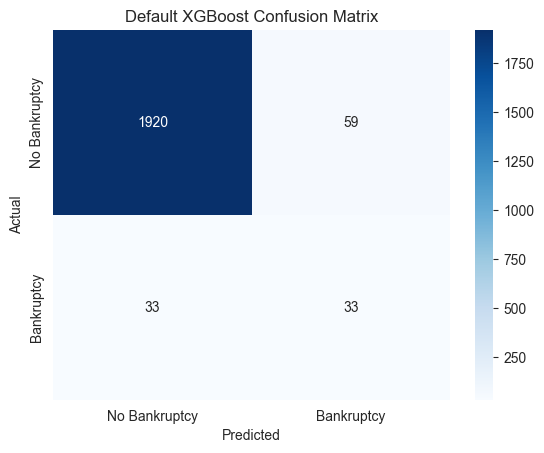


Tuned XGBoost Performance:
----------------------------------------
Balanced Accuracy: 0.8391
Sensitivity (Recall): 0.8030
Precision: 0.1767
AUC-ROC: 0.9282
F1-Score: 0.2896


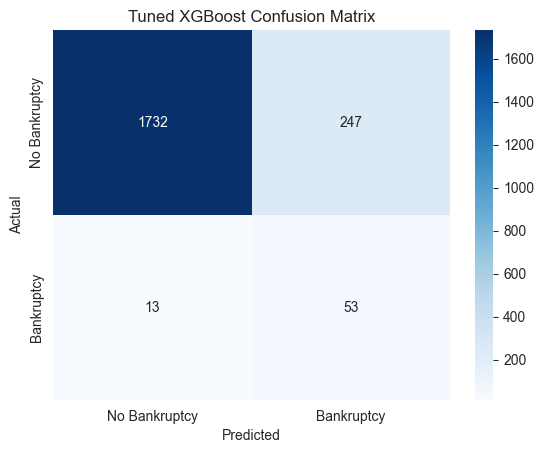


Improvement from Tuning:
----------------------------------------
Balanced Accuracy: +14.15%
Sensitivity (Recall): +60.61%
Precision: -50.75%
AUC-ROC: -0.72%
F1-Score: -30.67%

Best Parameters from Grid Search:
----------------------------------------
{'colsample_bytree': 0.8, 'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}


In [32]:
import xgboost as xgb
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                            roc_auc_score, recall_score, f1_score, roc_curve, balanced_accuracy_score)
from sklearn.model_selection import train_test_split, GridSearchCV, TunedThresholdClassifierCV
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# 1. Default Model
default_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric = 'auc')
default_xgb.fit(X_train, y_train)
y_pred_default = default_xgb.predict(X_test)
y_proba_default = default_xgb.predict_proba(X_test)[:, 1]


# 2. Tuned Model with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'),
                         param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
# y_pred_tuned = best_xgb.predict(X_test)
y_proba_tuned = best_xgb.predict_proba(X_test)[:, 1]

# get optimal threshold using roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_tuned)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

target_recall = 0.80
optimal_idx = np.argmin(np.abs(tpr - target_recall))
optimal_threshold = thresholds[optimal_idx]

y_pred_tuned = (y_proba_tuned >= optimal_threshold).astype(int)

def evaluate_model(y_true, y_pred, y_proba, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    metrics = {
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Sensitivity (Recall)': recall_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),  # False Negative Rate
        'AUC-ROC': roc_auc_score(y_true, y_proba),
        'F1-Score': f1_score(y_true, y_pred)
    }
    
    print(f"\n{model_name} Performance:")
    print("-"*40)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=['No Bankruptcy', 'Bankruptcy'], 
               yticklabels=['No Bankruptcy', 'Bankruptcy'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return metrics

# Evaluate both models
default_metrics = evaluate_model(y_test, y_pred_default, y_proba_default, "Default XGBoost")
tuned_metrics = evaluate_model(y_test, y_pred_tuned, y_proba_tuned, "Tuned XGBoost")

# Compare improvements
print("\nImprovement from Tuning:")
print("-"*40)
for metric in default_metrics.keys():
    improvement = (tuned_metrics[metric] - default_metrics[metric]) / default_metrics[metric] * 100
    print(f"{metric}: {improvement:+.2f}%")

# Print best parameters
print("\nBest Parameters from Grid Search:")
print("-"*40)
print(grid_search.best_params_)

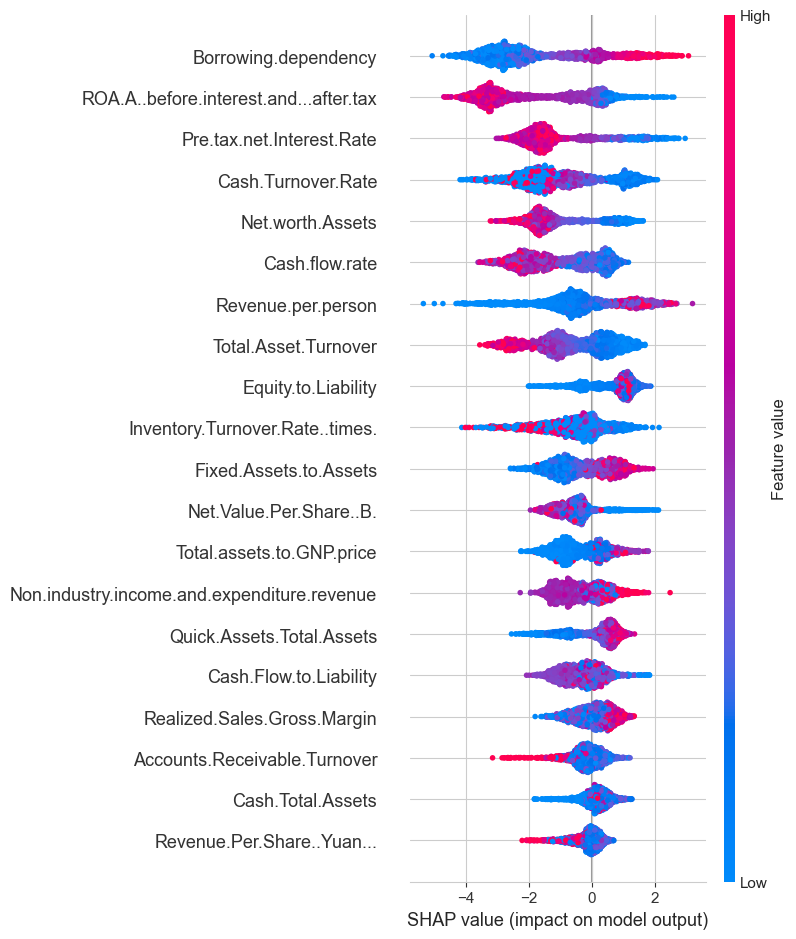

In [33]:
import shap  
explainer = shap.TreeExplainer(best_xgb)  
shap_values = explainer.shap_values(X_test)  
shap.summary_plot(shap_values, X_test) 

In [34]:
optimal_threshold

0.0045851893